# EDA  (15GB) — Fashion Product Images Dataset


In [1]:
# 📦 Instalar kagglehub y descargar el dataset de Kaggle
!pip install kagglehub --quiet

import kagglehub

# Descargar el dataset "Fashion Product Images" desde Kaggle
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")

print("✅ Dataset descargado correctamente.")
print("📂 Ruta local de los archivos:", path)


Using Colab cache for faster access to the 'fashion-product-images-dataset' dataset.
✅ Dataset descargado correctamente.
📂 Ruta local de los archivos: /kaggle/input/fashion-product-images-dataset


In [2]:
import os

# 📂 Detectar carpeta raíz real del dataset
base_path = os.path.join(path, "fashion-dataset")
if not os.path.exists(base_path):
    base_path = path  # por si acaso no existe la subcarpeta

print("Contenido del dataset:")
print(os.listdir(base_path))

# 📸 Ruta de la carpeta de imágenes
images_path = os.path.join(base_path, "images")

# Verificar si la carpeta de imágenes existe
if os.path.exists(images_path):
    image_files = os.listdir(images_path)
    print(f"\n✅ Carpeta 'images' encontrada con {len(image_files):,} archivos.")
    print("🔹 Ejemplo de nombres de archivo:", image_files[:10])
else:
    print("⚠️ No se encontró la carpeta 'images'. Revisa el nombre o la descarga.")


Contenido del dataset:
['images.csv', 'images', 'styles.csv', 'styles', 'fashion-dataset']

✅ Carpeta 'images' encontrada con 44,441 archivos.
🔹 Ejemplo de nombres de archivo: ['31973.jpg', '30778.jpg', '19812.jpg', '22735.jpg', '38246.jpg', '16916.jpg', '52876.jpg', '39500.jpg', '44758.jpg', '59454.jpg']


Total de imágenes detectadas (extensiones válidas): 44,441


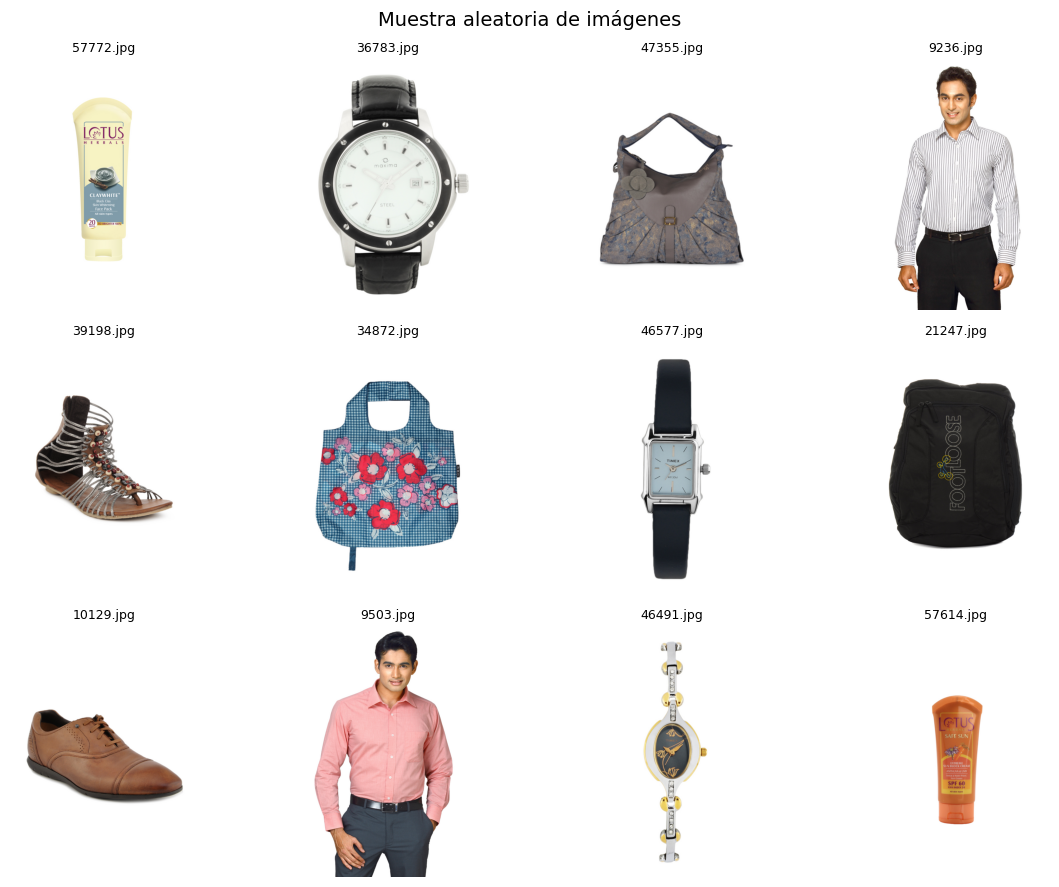

In [3]:
import os, random
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt

random.seed(42)

assert 'images_path' in globals() and os.path.exists(images_path), "No se encontró images_path. Ejecuta la celda anterior."

# Extensiones válidas
valid_ext = {".jpg", ".jpeg", ".png"}
image_files = [f for f in os.listdir(images_path) if os.path.splitext(f)[1].lower() in valid_ext]

print(f"Total de imágenes detectadas (extensiones válidas): {len(image_files):,}")

N = 12
sample_files = random.sample(image_files, k=min(N, len(image_files)))

# Configurar grilla
rows, cols = 3, 4
plt.figure(figsize=(cols * 3, rows * 3))

bad = 0
for i, fname in enumerate(sample_files, 1):
    fp = os.path.join(images_path, fname)
    try:
        img = Image.open(fp).convert("RGB")
    except (UnidentifiedImageError, OSError):
        bad += 1
        continue

    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.title(fname, fontsize=9)
    plt.axis("off")

plt.suptitle("Muestra aleatoria de imágenes", fontsize=14)
plt.tight_layout()
plt.show()

if bad > 0:
    print(f"⚠️ Imágenes no legibles en la muestra: {bad}")


In [4]:
import pandas as pd

# Cargar el archivo styles.csv
csv_path = os.path.join(base_path, "styles.csv")
df = pd.read_csv(csv_path, on_bad_lines='skip')  # algunos registros pueden tener errores de formato
print(f"✅ Archivo styles.csv cargado con {len(df):,} filas y {df.shape[1]} columnas.")
print("\nColumnas disponibles:", df.columns.tolist()[:10])

# Extraer IDs del CSV y del directorio de imágenes
df['id'] = df['id'].astype(str)
csv_ids = set(df['id'])
img_ids = {os.path.splitext(f)[0] for f in image_files}

# 📊 Comparar IDs del CSV vs imágenes
only_in_csv = csv_ids - img_ids
only_in_imgs = img_ids - csv_ids
both = csv_ids & img_ids

print(f"\n🧾 Productos en CSV: {len(csv_ids):,}")
print(f"🖼️ Imágenes en carpeta: {len(img_ids):,}")
print(f"✅ Coincidencias entre ambos: {len(both):,}")
print(f"❌ Faltantes (solo en CSV): {len(only_in_csv):,}")
print(f"⚠️ Sobrantes (solo en imágenes): {len(only_in_imgs):,}")

# 🔍 Mostrar algunos ejemplos de discrepancias
print("\nEjemplos de IDs que están solo en CSV:", list(only_in_csv)[:5])
print("Ejemplos de IDs que están solo en imágenes:", list(only_in_imgs)[:5])


✅ Archivo styles.csv cargado con 44,424 filas y 10 columnas.

Columnas disponibles: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

🧾 Productos en CSV: 44,424
🖼️ Imágenes en carpeta: 44,441
✅ Coincidencias entre ambos: 44,419
❌ Faltantes (solo en CSV): 5
⚠️ Sobrantes (solo en imágenes): 22

Ejemplos de IDs que están solo en CSV: ['39410', '39403', '12347', '39425', '39401']
Ejemplos de IDs que están solo en imágenes: ['23100', '23117', '23115', '23103', '23124']


In [5]:
#Filtrar el DataFrame para mantener solo los registros con imagen disponible
df_clean = df[df['id'].isin(both)].copy()
print(f"✅ Dataset limpio: {len(df_clean):,} filas (coinciden CSV e imagen)")

#filtrar también los nombres de archivo válidos
valid_img_ids = set(df_clean['id'])
image_files_clean = [f for f in image_files if os.path.splitext(f)[0] in valid_img_ids]

print(f"Imágenes válidas después de limpieza: {len(image_files_clean):,}")
print(f"Ejemplo de ID válido: {df_clean['id'].iloc[0]} → {df_clean['productDisplayName'].iloc[0]}")


✅ Dataset limpio: 44,419 filas (coinciden CSV e imagen)
🖼️ Imágenes válidas después de limpieza: 44,419
🔍 Ejemplo de ID válido: 15970 → Turtle Check Men Navy Blue Shirt


In [6]:
print("Conteo de valores faltantes (NaN) por columna:\n")
print(df_clean.isna().sum())

# Distribución de las principales variables categóricas
categorical_cols = ["gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"]

print("\n\nDistribución de categorías principales:\n")
for col in categorical_cols:
    print(f"--- {col} ---")
    vc = df_clean[col].value_counts()
    print(vc.head(10))  # mostrar las 10 más frecuentes
    print(f"Total valores únicos: {df_clean[col].nunique()}")
    print()

Conteo de valores faltantes (NaN) por columna:

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


Distribución de categorías principales:

--- gender ---
gender
Men       22142
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64
Total valores únicos: 5

--- masterCategory ---
masterCategory
Apparel           21392
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64
Total valores únicos: 7

--- subCategory ---
subCategory
Topwear       15398
Shoes          7343
Bags           3055
Bottomwear     2693
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Sandal        

In [7]:
df_clean_no_na = df_clean.dropna().copy()
print(f"Filas restantes tras eliminar NaN: {len(df_clean_no_na):,} (de {len(df_clean):,})")
print(f"Filas eliminadas: {len(df_clean) - len(df_clean_no_na):,}")

# Comprobamos que no quede ningún NaN
print("\n🔍 Revisión post-limpieza:")
print(df_clean_no_na.isna().sum().sum(), "valores NaN restantes")

Filas restantes tras eliminar NaN: 44,072 (de 44,419)
Filas eliminadas: 347

🔍 Revisión post-limpieza:
0 valores NaN restantes


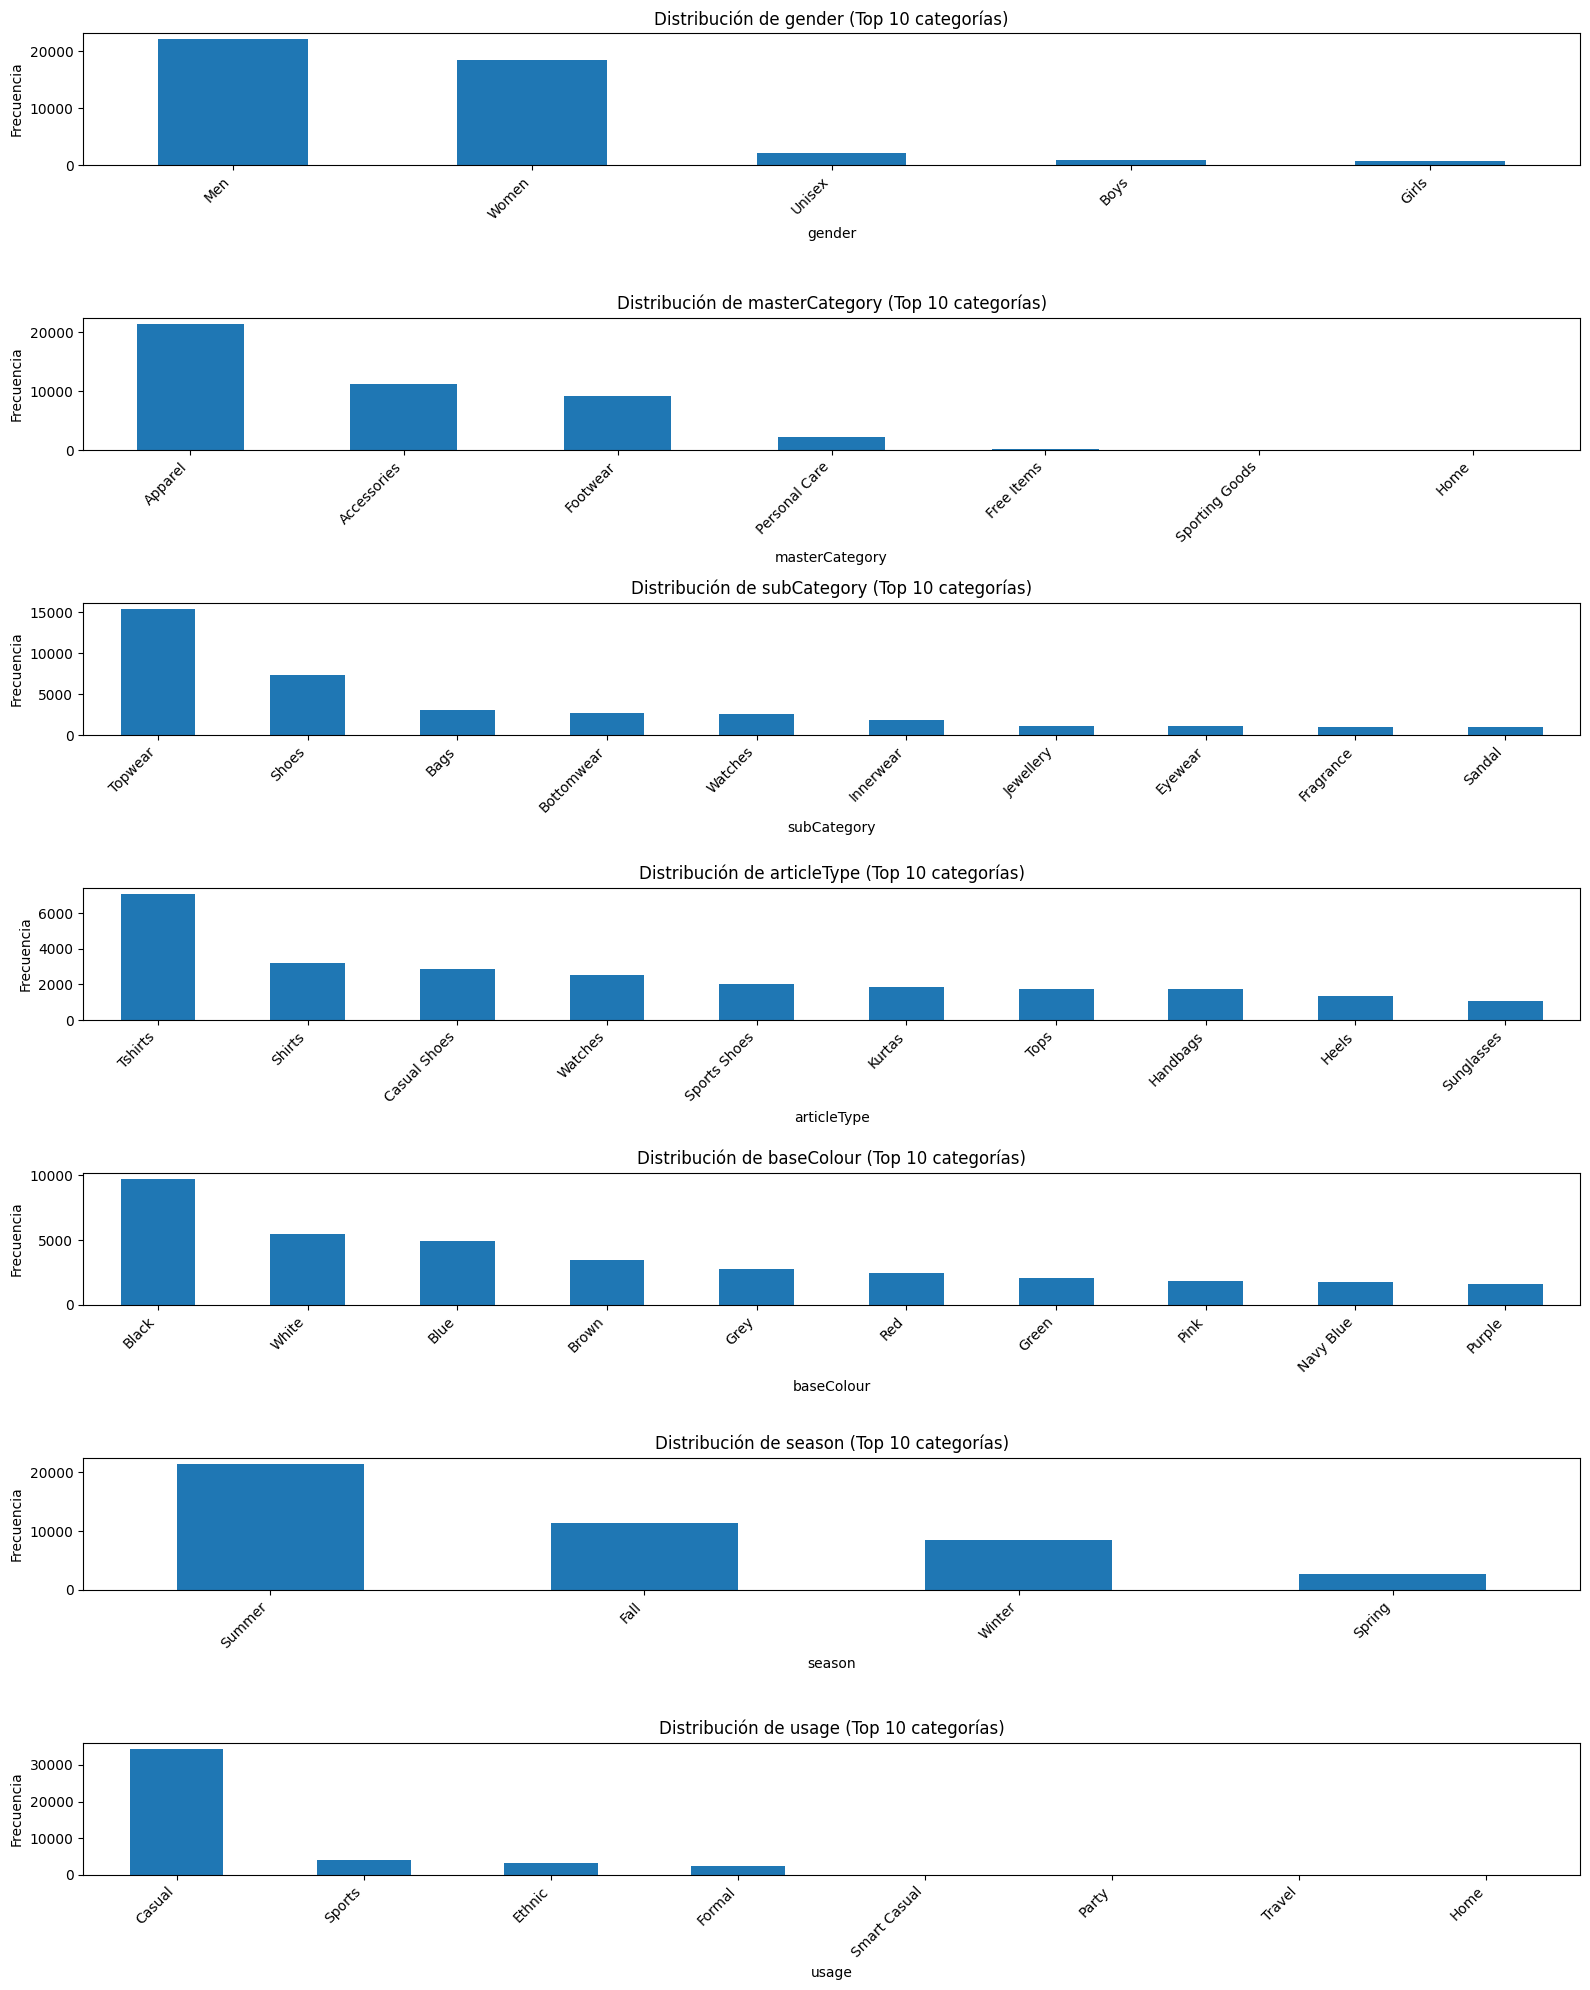

In [8]:
import matplotlib.pyplot as plt

# Definir columnas categóricas a visualizar
categorical_cols = ["gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"]

plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    value_counts = df_clean_no_na[col].value_counts().head(10)
    value_counts.plot(kind="bar")
    plt.title(f"Distribución de {col} (Top 10 categorías)")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Total archivos analizados: 44,419
Archivos no legibles/corruptos: 0

Ancho (px):
  count=44,419  min=150.0  p25=1080.00  p50=1080.00  p75=1800.00  p95=1800.00  max=3744.0

Alto (px):
  count=44,419  min=200.0  p25=1440.00  p50=1440.00  p75=2400.00  p95=2400.00  max=5616.0

Aspect ratio (w/h):
  count=44,419  min=0.664179104477612  p25=0.75  p50=0.75  p75=0.75  p95=0.75  max=1.0

Tamaño archivo (bytes):
  count=44,419  min=2727.0  p25=233699.50  p50=313621.00  p75=379019.50  p95=680261.40  max=4692328.0

Distribución por orientación (aprox.):
  Cuadradas (~1:1): 5 (0.0%)
  Apaisadas  (>1:1): 0 (0.0%)
  Verticales (<1:1): 44,414 (100.0%)


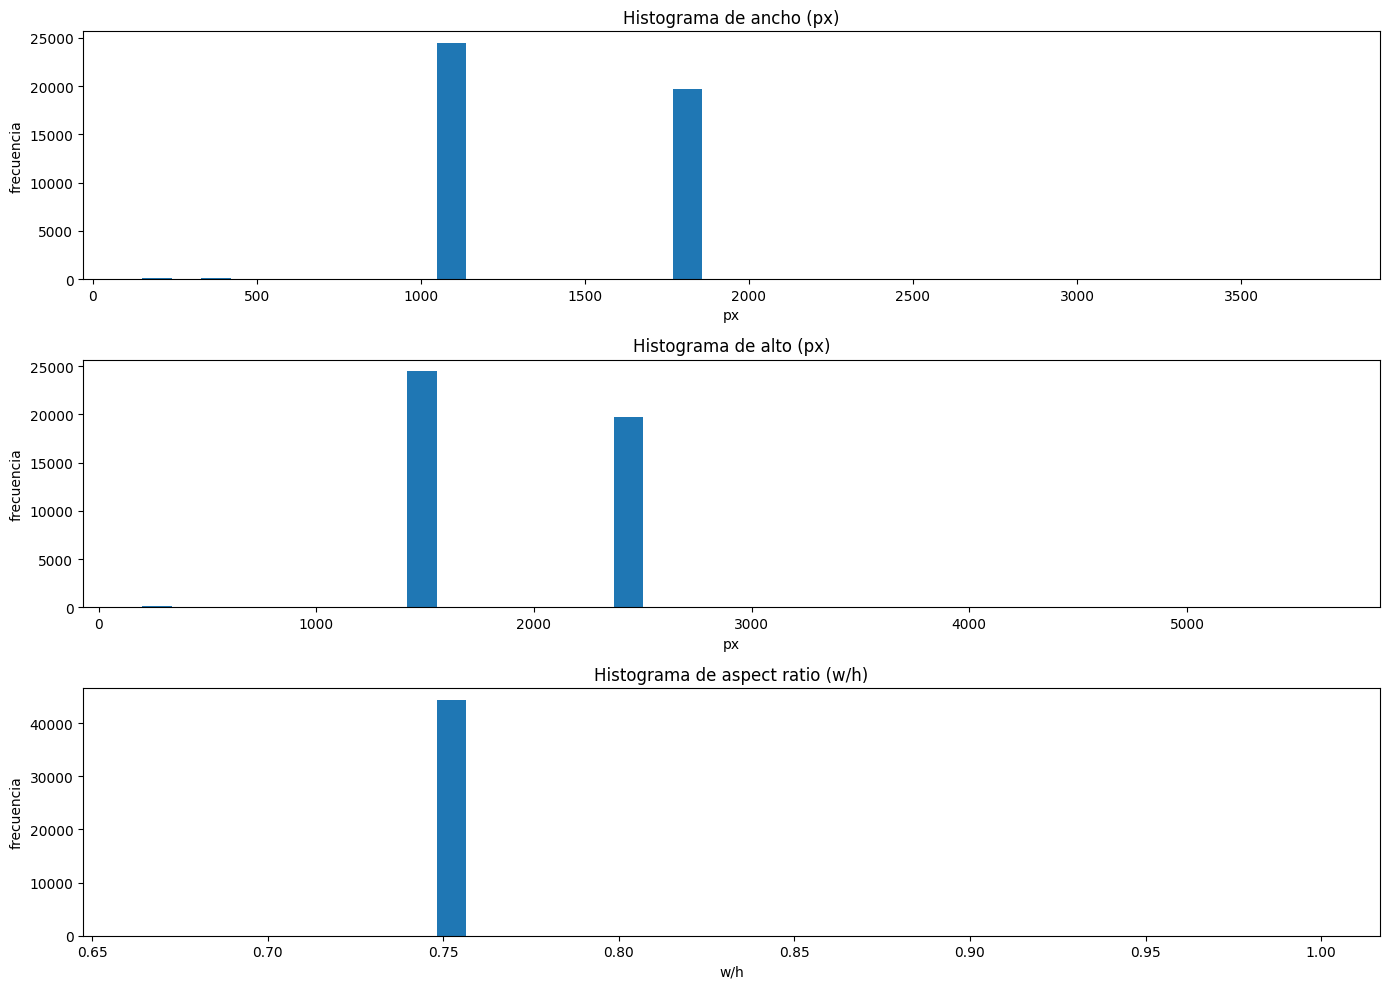

In [10]:
import os, random, math
from PIL import Image, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt

# Comprobaciones previas
assert 'images_path' in globals() and os.path.exists(images_path), "No se encontró images_path. Ejecuta las celdas previas."
assert 'image_files_clean' in globals() and len(image_files_clean) > 0, "No se encontró image_files_clean. Ejecuta la limpieza previa."

# Parámetros
random.seed(42)
SAMPLE_N = None  # None para usar todas las imágenes (puede tardar)
files = image_files_clean if SAMPLE_N is None else random.sample(image_files_clean, k=min(SAMPLE_N, len(image_files_clean)))

# Recopilación
widths, heights, aspects, sizes_bytes = [], [], [], []
bad_files = []

for fname in files:
    fpath = os.path.join(images_path, fname)
    try:
        with Image.open(fpath) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspects.append(w / h if h != 0 else np.nan)
        sizes_bytes.append(os.path.getsize(fpath))
    except (UnidentifiedImageError, OSError, ValueError):
        bad_files.append(fname)

widths = np.array(widths, dtype=np.float64)
heights = np.array(heights, dtype=np.float64)
aspects = np.array(aspects, dtype=np.float64)
sizes_bytes = np.array(sizes_bytes, dtype=np.float64)

def pct(x, q):
    return float(np.nanpercentile(x, q)) if x.size else float('nan')

def summarize(name, arr):
    print(f"\n{name}:")
    print(f"  count={arr.size:,}  min={np.nanmin(arr) if arr.size else 'nan'}  p25={pct(arr,25):.2f}  p50={pct(arr,50):.2f}  p75={pct(arr,75):.2f}  p95={pct(arr,95):.2f}  max={np.nanmax(arr) if arr.size else 'nan'}")

print(f"Total archivos analizados: {len(files):,}")
print(f"Archivos no legibles/corruptos: {len(bad_files):,}")

summarize("Ancho (px)", widths)
summarize("Alto (px)", heights)
summarize("Aspect ratio (w/h)", aspects)
summarize("Tamaño archivo (bytes)", sizes_bytes)

# Clasificación simple de proporciones
sq = np.sum(np.isfinite(aspects) & (np.abs(aspects - 1.0) <= 0.05))
land = np.sum(np.isfinite(aspects) & (aspects > 1.05))
port = np.sum(np.isfinite(aspects) & (aspects < 0.95))
tot = np.sum(np.isfinite(aspects))

print("\nDistribución por orientación (aprox.):")
print(f"  Cuadradas (~1:1): {sq:,} ({(sq/tot*100 if tot else 0):.1f}%)")
print(f"  Apaisadas  (>1:1): {land:,} ({(land/tot*100 if tot else 0):.1f}%)")
print(f"  Verticales (<1:1): {port:,} ({(port/tot*100 if tot else 0):.1f}%)")

# Histogramas
plt.figure(figsize=(14, 10))

plt.subplot(3,1,1)
plt.hist(widths, bins=40)
plt.title("Histograma de ancho (px)")
plt.xlabel("px"); plt.ylabel("frecuencia")

plt.subplot(3,1,2)
plt.hist(heights, bins=40)
plt.title("Histograma de alto (px)")
plt.xlabel("px"); plt.ylabel("frecuencia")

plt.subplot(3,1,3)
plt.hist(aspects[np.isfinite(aspects)], bins=40)
plt.title("Histograma de aspect ratio (w/h)")
plt.xlabel("w/h"); plt.ylabel("frecuencia")

plt.tight_layout()
plt.show()

# Muestra de archivos problemáticos (si los hay)
if bad_files:
    print("\nEjemplos de archivos no legibles:", bad_files[:10])


In [11]:
import os

# Carpeta de salida
output_dir = "/content/fashion_clean"
os.makedirs(output_dir, exist_ok=True)

# Guardar el DataFrame limpio
csv_output_path = os.path.join(output_dir, "df_final.csv")
df_clean_no_na.to_csv(csv_output_path, index=False)

# Opcional: guardar listado de imágenes válidas
img_list_path = os.path.join(output_dir, "image_files_clean.txt")
with open(img_list_path, "w") as f:
    for fname in image_files_clean:
        f.write(fname + "\n")

print("✅ Archivos guardados correctamente en:", output_dir)
print(f"- DataFrame final: {csv_output_path}")
print(f"- Lista de imágenes: {img_list_path}")


✅ Archivos guardados correctamente en: /content/fashion_clean
- DataFrame final: /content/fashion_clean/df_final.csv
- Lista de imágenes: /content/fashion_clean/image_files_clean.txt


In [13]:
csv_path = "/content/fashion_clean/df_final.csv"

df_final = pd.read_csv(csv_path)
df_final.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [14]:
df_final.shape

(44072, 10)